In [45]:
import requests
import pandas as pd
import datetime as dt
import seaborn as sns
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# https://stackoverflow.com/questions/25338608/download-all-stock-symbol-list-of-a-market
# https://www.nasdaq.com/market-activity/stocks/screener?exchange=NASDAQ&render=download
nasdaq_csv = 'nasdaq_screener_1634070837386.csv'
# https://www.nasdaq.com/market-activity/stocks/screener?exchange=NYSE&render=download
nyse_csv = 'nasdaq_screener_1634070798515.csv'

nasdaq_df = pd.read_csv(nasdaq_csv)
nyse_df = pd.read_csv(nyse_csv)

print(len(nasdaq_df))
nasdaq_df.head()

4566


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\desha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,AACG,ATA Creativity Global American Depositary Shares,$2.39,0.0500,2.137%,7.576584e+07,China,NaN,331389,Miscellaneous,Service to the Health Industry
1,AACIU,Armada Acquisition Corp. I Unit,$9.95,0.0066,0.066%,0.000000e+00,United States,2021.0,1002,NaN,NaN
2,AADI,Aadi Bioscience Inc. Common Stock,$27.28,0.3300,1.224%,5.693156e+08,United States,NaN,55164,Health Care,Biotechnology: Pharmaceutical Preparations
3,AAL,American Airlines Group Inc. Common Stock,$20.29,0.1600,0.795%,1.313692e+10,United States,NaN,18310460,Transportation,Air Freight/Delivery Services
4,AAME,Atlantic American Corporation Common Stock,$4.38,-0.1200,-2.667%,8.939914e+07,United States,NaN,13171,Finance,Life Insurance


In [46]:
print(len(nyse_df))
nyse_df.head()

3143


,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$147.95,-2.07,-1.38%,4.478782e+10,United States,1999.0,1672047,Capital Goods,Electrical Products
1,AA,Alcoa Corporation Common Stock,$47.78,0.49,1.036%,8.928465e+09,NaN,2016.0,6821283,Basic Industries,Metal Fabrications
2,AAC,Ares Acquisition Corporation Class A Ordinary ...,$9.77,-0.01,-0.102%,1.221250e+09,NaN,2021.0,320598,Finance,Business Services
3,AAIC,Arlington Asset Investment Corp Class A (new),$3.88,0.03,0.779%,1.254445e+08,United States,NaN,171259,Consumer Services,Real Estate Investment Trusts
4,AAIC^B,Arlington Asset Investment Corp 7.00%,$24.85,0.02,0.081%,NaN,United States,NaN,550,NaN,NaN


In [47]:
all_stocks_df = nyse_df.append(nasdaq_df)
all_stocks_df.reset_index(inplace=True, drop=True)
print('Rows in nyse_df + Rows in nasdaq_df:', len(nyse_df) + len(nasdaq_df))
print('Rows in concatenated df:', len(all_stocks_df))
all_stocks_df.head()

Rows in nyse_df + Rows in nasdaq_df: 7709
Rows in concatenated df: 7709


,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$147.95,-2.07,-1.38%,4.478782e+10,United States,1999.0,1672047,Capital Goods,Electrical Products
1,AA,Alcoa Corporation Common Stock,$47.78,0.49,1.036%,8.928465e+09,NaN,2016.0,6821283,Basic Industries,Metal Fabrications
2,AAC,Ares Acquisition Corporation Class A Ordinary ...,$9.77,-0.01,-0.102%,1.221250e+09,NaN,2021.0,320598,Finance,Business Services
3,AAIC,Arlington Asset Investment Corp Class A (new),$3.88,0.03,0.779%,1.254445e+08,United States,NaN,171259,Consumer Services,Real Estate Investment Trusts
4,AAIC^B,Arlington Asset Investment Corp 7.00%,$24.85,0.02,0.081%,NaN,United States,NaN,550,NaN,NaN


In [48]:
def read_concat_csvs(csv1, csv2):
    '''Enter two csvs and the function will concatenate them into a single pandas DataFrame.'''
    df1 = pd.read_csv(csv1)
    df2 = pd.read_csv(csv2)
    all_df = df1.append(df2)
    all_df.reset_index(inplace=True, drop=True)
    return all_df

In [49]:
# !pip install pandas pyarrow

data = [pd.read_parquet(f'wallstreetbets_comments_{i}.parquet.gzip') for i in range(1, 7)]
single_df = pd.concat(data)
single_df.columns = ['Comment', 'Timestamp', 'Link']
single_df.head()

,Comment,Timestamp,Link
0,[removed],1601670780,/r/wallstreetbets/comments/j41xw2/weekend_disc...
1,Honestly the best part of the week. 👊 🍻,1601670780,/r/wallstreetbets/comments/j41xw2/weekend_disc...
2,Haha,1601670780,/r/wallstreetbets/comments/j3l89d/loss_porn_ba...
3,Origin goes back to at least the 50s. The song...,1601670776,/r/wallstreetbets/comments/j3wgdt/built_differ...
4,“Well I really loved art history.... but then ...,1601670774,/r/wallstreetbets/comments/j3z9hc/40583_in_6_m...


In [50]:
len(single_df)

5207419

In [51]:

single_df['Time'] = [dt.datetime.fromtimestamp(t).strftime('%Y-%m-%d %H:%M:%S') for t in single_df['Timestamp']]
single_df.head() 

,Comment,Timestamp,Link,Time
0,[removed],1601670780,/r/wallstreetbets/comments/j41xw2/weekend_disc...,2020-10-02 16:33:00
1,Honestly the best part of the week. 👊 🍻,1601670780,/r/wallstreetbets/comments/j41xw2/weekend_disc...,2020-10-02 16:33:00
2,Haha,1601670780,/r/wallstreetbets/comments/j3l89d/loss_porn_ba...,2020-10-02 16:33:00
3,Origin goes back to at least the 50s. The song...,1601670776,/r/wallstreetbets/comments/j3wgdt/built_differ...,2020-10-02 16:32:56
4,“Well I really loved art history.... but then ...,1601670774,/r/wallstreetbets/comments/j3z9hc/40583_in_6_m...,2020-10-02 16:32:54


In [52]:
print('Earliest time:', single_df['Time'].min())
print('Latest time:', single_df['Time'].max())

Earliest time: 2020-09-09 21:13:48
Latest time: 2021-09-09 21:03:00


In [53]:
some_well_known_stocks = ['MSFT', 'msft', '\\$MSFT', 'TSLA', 'tsla', '\\$TSLA', 'JNJ', 'jnj', '\\$JNJ', '\\$T']
print([{ticker : single_df['Comment'].str.count(ticker).sum()} for ticker in some_well_known_stocks])

[{'MSFT': 5106}, {'msft': 1099}, {'\\$MSFT': 196}, {'TSLA': 42455}, {'tsla': 7342}, {'\\$TSLA': 1733}, {'JNJ': 601}, {'jnj': 75}, {'\\$JNJ': 24}, {'\\$T': 3808}]


In [54]:
def df_parquet_reader():
    '''Uses 6 zipped parquet files in the format 'wallstreetbets_comments_{i}.parquet.gzip' that are located in your
    current directory. Returns them as a concatenated dataframe.  You must pip install pandas pyarrow.'''
    data = [pd.read_parquet(f'wallstreetbets_comments_{i}.parquet.gzip') for i in range(1, 7)]
    single_df = pd.concat(data)
    return single_df

def single_df_fixer(df):
    '''Cleans up the project's main DataFrame. Must pip install datetime as dt.'''
    if len(df.columns) == 3:
        df.columns = ['Comment', 'Timestamp', 'Link']
    else:
        pass
    df['Time'] = [dt.datetime.fromtimestamp(t).strftime('%Y-%m-%d %H:%M:%S') for t in single_df['Timestamp']]
    df['Year'] = [time[:4] for time in df['Time']]
    df['Month'] = [time[5:7] for time in df['Time']]
    df['Day'] = [time[8:10] for time in df['Time']]
    df['Hour'] = [time[10:13] for time in df['Time']]
    
    df = df.sort_values('Time')
    df.reset_index(inplace=True, drop=True)
    sid = SentimentIntensityAnalyzer()
    df['Sentiment'] = [sid.polarity_scores(comment)['compound'] for comment in df['Comment']]
    
    return df

In [55]:
fixed_df = single_df_fixer(single_df)
fixed_df

,Comment,Timestamp,Link,Time,Year,Month,Day,Hour,Sentiment
0,Enjoy you salty bastard :),1599700428,/r/wallstreetbets/comments/ipnztr/what_are_you...,2020-09-09 21:13:48,2020,09,09,21,0.4019
1,"""A red sun rises, blood has been spilled this ...",1599700430,/r/wallstreetbets/comments/ipniz0/hey_if_its_f...,2020-09-09 21:13:50,2020,09,09,21,-0.1761
2,this information was not useful to me,1599700430,/r/wallstreetbets/comments/ipnztr/what_are_you...,2020-09-09 21:13:50,2020,09,09,21,-0.3412
3,3am “they” are going to buy the shit out of an...,1599700436,/r/wallstreetbets/comments/ipnztr/what_are_you...,2020-09-09 21:13:56,2020,09,09,21,0.6124
4,"Nah, you didn’t know. Now you know 😁",1599700437,/r/wallstreetbets/comments/ipnztr/what_are_you...,2020-09-09 21:13:57,2020,09,09,21,-0.1027
...,...,...,...,...,...,...,...,...,...
5207414,Lmao. So far and still getting fuk,1631235762,/r/wallstreetbets/comments/pl5dpa/what_are_you...,2021-09-09 21:02:42,2021,09,09,21,0.5994
5207415,Get rid of that crap tomorrow when the market ...,1631235765,/r/wallstreetbets/comments/pl5dpa/what_are_you...,2021-09-09 21:02:45,2021,09,09,21,-0.3818
5207416,*has 2% SI but 30% Short volume*,1631235777,/r/wallstreetbets/comments/pl7u0c/everything_i...,2021-09-09 21:02:57,2021,09,09,21,0.0000
5207417,Go eat worms,1631235777,/r/wallstreetbets/comments/pl5dpa/what_are_you...,2021-09-09 21:02:57,2021,09,09,21,0.0000


In [56]:
fixed_df.to_csv('wallstreetbets_big_df.csv')

In [57]:
tsla_df = fixed_df.loc[fixed_df['Comment'].str.lower().str.contains('tsla')]
tsla_df.reset_index(inplace=True, drop=True)
print(tsla_df.shape)
tsla_df = tsla_df.drop('Timestamp', axis=1)
tsla_df.head()

# rolling_window = fixed_df['Comment'].str.lower().str.contains('tsla').rolling(30, center=False).sum()
# sns.set(rc={'figure.figsize': (10, 15)})
# sns.lineplot(x=rolling_window, y=rolling_window).set_title('MSFT Comments')

(47391, 9)


,Comment,Link,Time,Year,Month,Day,Hour,Sentiment
0,"The way I see it, there was a fuckload of mone...",/r/wallstreetbets/comments/ipt4pp/yo_this_shit...,2020-09-09 21:14:01,2020,09,09,21,-0.1531
1,"I hope Im wrong, but MM pumped TSLA AH to dump...",/r/wallstreetbets/comments/ipnztr/what_are_you...,2020-09-09 21:28:14,2020,09,09,21,-0.5423
2,But what if his dad was actually his mom and h...,/r/wallstreetbets/comments/iptkle/we_are_openi...,2020-09-09 21:29:52,2020,09,09,21,-0.7096
3,Bought back tsla today after selling yesterday...,/r/wallstreetbets/comments/ipnztr/what_are_you...,2020-09-09 21:43:43,2020,09,09,21,0.0000
4,"NVDA 510c seem safe, then again i could be bag...",/r/wallstreetbets/comments/ipnztr/what_are_you...,2020-09-09 21:59:48,2020,09,09,21,0.6597


In [58]:
monthly_tsla_df = tsla_df.groupby(['Year', 'Month']).mean('Sentiment')
print(monthly_tsla_df.shape)
monthly_tsla_df

(13, 1)


Sentiment
Year Month           
2020 09      0.042591
     10      0.061275
     11      0.070036
     12      0.059663
2021 01      0.069450
     02      0.063913
     03      0.070755
     04      0.055457
     05      0.039516
     06      0.061386
     07      0.051405
     08      0.047507
     09      0.077110

In [88]:
import yfinance
import pandas as pd
my_ticker = 'TSLA'
start_time = '2020-09-09'
end_time = '2021-09-30'
y_ticker = yfinance.Ticker(my_ticker)
close = y_ticker.history(start=start_time, end=end_time, interval='1d')['Close']

close_df = pd.DataFrame(close, columns=['Close'])
close_df = close_df.reset_index()
close_df['Year'] = close_df['Date'].dt.strftime('%Y')
close_df['Month'] = close_df['Date'].dt.strftime('%m')
close_df['Day'] = close_df['Date'].dt.strftime('%d')
close_df_monthly = close_df.groupby(['Year', 'Month']).mean()
close_df_monthly

Close
Year Month            
2020 09     412.840628
     10     427.209545
     11     465.612498
     12     638.818640
2021 01     828.776839
     02     794.269470
     03     656.802607
     04     709.618094
     05     616.753000
     06     626.919550
     07     659.134760
     08     705.243172
     09     752.876001

In [9]:
live_stream = yfinance.download(tickers=my_ticker, period='1d', interval='1m')['Open'][-1]

live_stream

[*********************100%***********************]  1 of 1 completed


1172.0

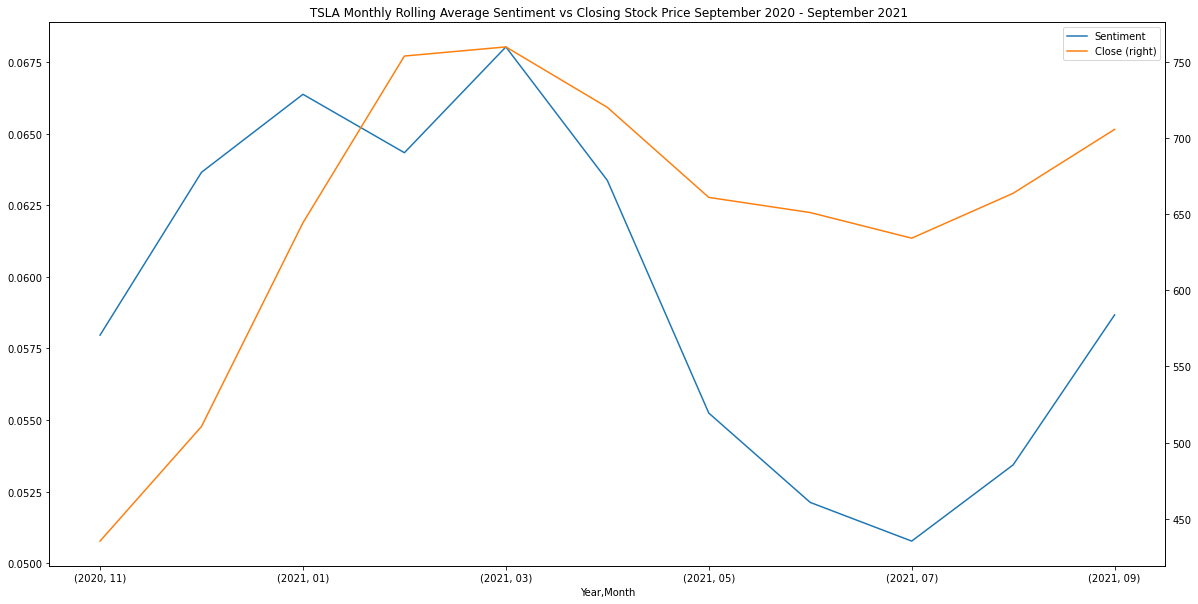

In [98]:
from matplotlib import pyplot as plt


tsla_monthly_rolling_window = monthly_tsla_df.rolling(3, center=False).mean()
tsla_stock_monthly_rolling_window = close_df_monthly.rolling(3, center=False).mean()
 

ax = tsla_monthly_rolling_window.plot.line(figsize=(20, 10), title='TSLA Monthly Rolling Average Sentiment vs Closing Stock Price September 2020 - September 2021')
tsla_stock_monthly_rolling_window.plot.line(ax=ax, secondary_y=True)

plt.show()

In [90]:
daily_tsla_df = tsla_df.groupby(['Year', 'Month', 'Day']).mean('Sentiment')
print(daily_tsla_df.shape)
daily_tsla_df.head()

(343, 1)


Sentiment
Year Month Day           
2020 09    09    0.056133
           10    0.042638
           11    0.029184
           12    0.038078
           13    0.084388

In [91]:
close_df_daily = close_df.groupby(['Year', 'Month', 'Day']).mean('Sentiment')
close_df_daily.head()

Close
Year Month Day            
2020 09    09   366.279999
           10   371.339996
           11   372.720001
           14   419.619995
           15   449.760010

<AxesSubplot:title={'center':'TSLA 5-Day Rolling Average Sentiment vs Closing Stock Price September 2020 - September 2021'}, xlabel='Year,Month,Day'>

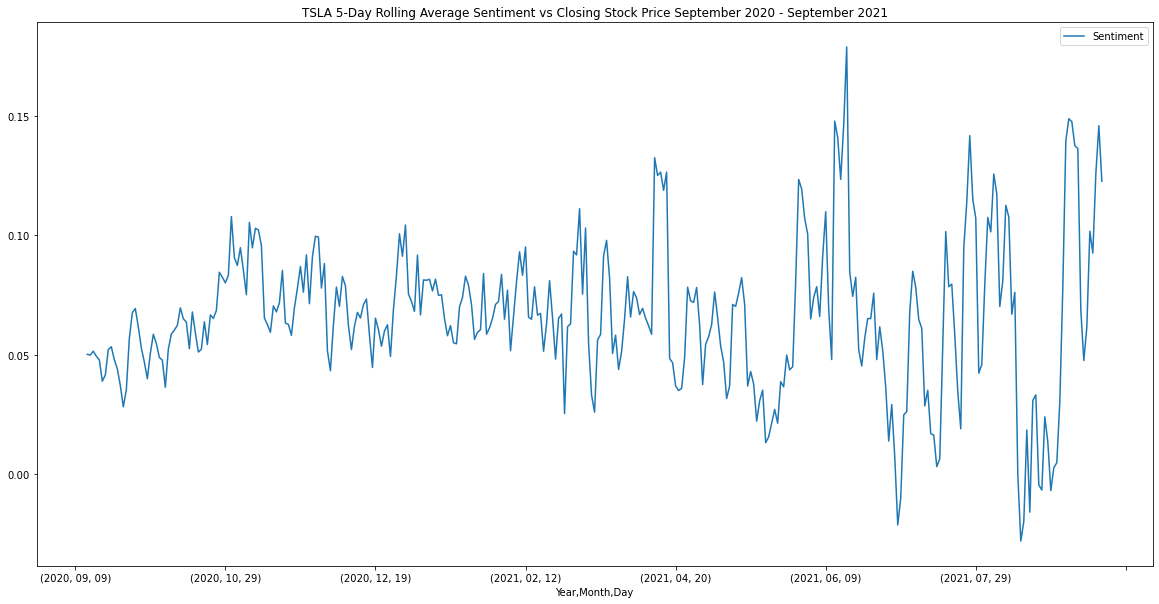

In [104]:
tsla_daily_rolling_window = daily_tsla_df.rolling(5, center=False).mean()
tsla_stock_daily_rolling_window = close_df_daily.rolling(5, center=False).mean()

tsla_daily_rolling_window.plot.line(figsize=(20, 10), title='TSLA 5-Day Rolling Average Sentiment vs Closing Stock Price September 2020 - September 2021')
# tsla_stock_daily_rolling_window.plot.line(ax=ax, secondary_y=True)
